In [ ]:
##########################################
## Made by : HERO Kwon
## Title : TER
## Version : v0
## Date : 2018.05.29.
## Description : TER-RM Algorithm
##########################################


# Main

# packages

import numpy as np
import pandas as pd
import scipy as sp
import os
import re
import imageio
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import confusion_matrix
import time

from sklearn.datasets import load_iris
 
data = load_iris()
data_v = data['data']
data_l = data['target']

data_train = np.array([]).reshape(0,4)
data_test = np.array([]).reshape(0,4)
label_train = np.array([])
label_test = np.array([])

for target in list(set(data['target'])):
    v_train, v_test = train_test_split(data_v[data_l==target],test_size = 0.5)
    l_train = np.full(shape=len(v_train),fill_value=target)
    l_test = np.full(shape=len(v_test),fill_value=target)
    data_train = np.concatenate((data_train,v_train))
    data_test = np.concatenate((data_test,v_test))
    label_train = np.concatenate((label_train,l_train))
    label_test = np.concatenate((label_test,l_test))

## TER Algorithm
# Basis : RM2
def RMmodel(order,X):
    m,l = X.shape
    
    M1 = []
    M2 = []
    M3 = []
    MM1 = []
    MM3 = []

    Msum = np.sum(X,axis=1)

    for i in range(order):
        for k in range(l):
            M1.append(X[:,k]**(i+1))
            if (i>0):
                M3.append(X[:,k]*Msum**(i)) 
        M2.append(Msum**(i+1))
        MM1.append(M1)
        if (i>0):
            MM3.append(M3)

    MM1 = np.array(MM1).T
    MM1 = MM1.reshape((m,-1,1)).squeeze(axis=2)
    M2 = np.array(M2).T
    if (len(MM3)):
        MM3 = np.array(MM3).T
        MM3 = MM3.reshape((m,-1,1)).squeeze(axis=2)
        P = np.concatenate((np.ones((m,1)),MM1,M2,MM3),axis=1)
    else : P = np.concatenate((np.ones((m,1)),MM1,M2),axis=1)

    return(P)

def TERmodel(rank,r,n,X,Y):
    alpha = []
    for k in list(set(Y)):

        P_n = RMmodel(rank,X[Y!=k])
        P_p = RMmodel(rank,X[Y==k])

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        yk_n = (r-n) * np.ones(shape=Y[Y!=k].shape)
        yk_p = (r+n) * np.ones(shape=Y[Y==k].shape)

        I = np.eye(P_n.shape[1])
        b = 10**(-4)

        first_eq = np.linalg.pinv(b*I + (1/mk_n)*(P_n.T).dot(P_n) + (1/mk_p)*(P_p.T).dot(P_p))
        second_eq = (1/mk_n)*(P_n.T).dot(yk_n) + (1/mk_p)*(P_p.T).dot(yk_p)
        ak = np.dot(first_eq,second_eq)

        alpha.append(ak)
    return(np.array(alpha).T)

def TERmodel_new(rank,r,n,X,Y):
    alpha = []
    for k in list(set(Y)):
        P = RMmodel(rank,X)
        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        w_n = 1/mk_n
        w_p = 1/mk_p

        ones_mkn = np.ones(mk_n)*w_n
        ones_mkp = np.ones(mk_p)*w_p

        W = np.zeros((len(Y), len(Y)), float)
        np.fill_diagonal(W,np.concatenate((ones_mkn,ones_mkp)))
        yk = np.concatenate(((r-n)*ones_mkn,(r+n)*ones_mkp)).T
        ak = np.linalg.pinv((P.T).dot(W).dot(P)).dot(P.T).dot(W).dot(yk)

        alpha.append(ak)
    return(np.array(alpha).T)



In [ ]:

rank_acc = pd.DataFrame()

alpha = TERmodel_new(6,0.5,0.5,data_train,label_train)

P_t = RMmodel(6,data_test)
yt = P_t.dot(alpha)
yt1 = np.argmax(yt,axis=1)
# plt.plot(yt1)

pred_true = np.equal(label_test,yt1)
acc = np.count_nonzero(pred_true) / len(pred_true)

In [ ]:
acc

In [ ]:
X.shape

In [ ]:
rank,r,n,X,Y = 6,0.5,0.5,data_train,label_train

In [ ]:
X.shape

In [ ]:
    for k in list(set(Y)):
        P = RMmodel(rank,X)
        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        w_n = 1/mk_n
        w_p = 1/mk_p

        ones_mkn = 1*(Y!=k)*w_n
        ones_mkp = 1*(Y==k)*w_p

        W = np.zeros((len(Y), len(Y)), float)
        np.fill_diagonal(W,ones_mkn+ones_mkp)
        yk = ((r-n)*ones_mkn+(r+n)*ones_mkp).T
        ak = np.linalg.pinv((P.T).dot(W).dot(P)).dot(P.T).dot(W).dot(yk)

In [ ]:
ones_mkn = np.ones(mk_n)*w_n

In [ ]:
ones_mkn.shape

In [ ]:
ones_mkn.shape

In [ ]:
len(Y)

In [ ]:
def TERmodel_new(rank,r,n,X,Y):
    alpha = []
    for k in list(set(Y)):
        P = RMmodel(rank,X)
        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        w_n = 1/mk_n
        w_p = 1/mk_p

        ones_mkn = 1*(Y!=k)*w_n
        ones_mkp = 1*(Y==k)*w_p

        W = np.zeros((len(Y), len(Y)), float)
        np.fill_diagonal(W,ones_mkn+ones_mkp)
        yk = ((r-n)*ones_mkn+(r+n)*ones_mkp).T
        ak = np.linalg.pinv((P.T).dot(W).dot(P)).dot(P.T).dot(W).dot(yk)

        alpha.append(ak)
    return(np.array(alpha).T)


rank_acc = pd.DataFrame()

alpha = TERmodel_new(6,0.5,0.5,data_train,label_train)

P_t = RMmodel(6,data_test)
yt = P_t.dot(alpha)
yt1 = np.argmax(yt,axis=1)
# plt.plot(yt1)

pred_true = np.equal(label_test,yt1)
acc = np.count_nonzero(pred_true) / len(pred_true)

In [ ]:
acc

In [ ]:
yt1

In [ ]:
plt.plot(yt1)

In [ ]:
def TERmodel_new(rank,r,n,X,Y,w_n,w_p):
    #simplified version of TER
    alpha = []
    for k in list(set(Y)):
        P = RMmodel(rank,X)
        ones_mkn = 1*(Y!=k)*w_n
        ones_mkp = 1*(Y==k)*w_p

        W = np.zeros((len(Y), len(Y)), float)
        np.fill_diagonal(W,ones_mkn+ones_mkp)
        yk = ((r-n)*ones_mkn+(r+n)*ones_mkp).T
        ak = np.linalg.pinv((P.T).dot(W).dot(P)).dot(P.T).dot(W).dot(yk)

        alpha.append(ak)
    return(np.array(alpha).T)

In [ ]:
rank_acc = pd.DataFrame()

mk_n = X[Y!=k].shape[0]
mk_p = X[Y==k].shape[0]

w_n = 1/mk_n
w_p = 1/mk_p

alpha = TERmodel_new(6,0.5,0.5,data_train,label_train,w_n,w_p)

In [ ]:
P_t = RMmodel(6,data_test)
yt = P_t.dot(alpha)
yt1 = np.argmax(yt,axis=1)
# plt.plot(yt1)

pred_true = np.equal(label_test,yt1)
acc = np.count_nonzero(pred_true) / len(pred_true)

In [ ]:
acc

In [ ]:
M_dict = {}

In [ ]:
M_dict['an'] = 0

In [ ]:
M_dict

In [ ]:
M_dict['0'] = (0,1),(0,1)

In [ ]:
M_dict

In [ ]:
M_dict.keys=='0'

In [ ]:
M_dict['0']

In [ ]:

def TERmodel_new(rank,r,n,X,Y,mod_w):
    #simplified version of TER
    alpha = []
    for k in list(set(Y)):
        P = RMmodel(rank,X)

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]
        w_n = 1/mk_n
        w_p = 1/mk_p

        w_n = mod_w[0][0] * w_n + mod_w[0][1]
        w_p = mod_w[1][0] * w_n + mod_w[1][1]

        ones_mkn = 1*(Y!=k)*w_n
        ones_mkp = 1*(Y==k)*w_p

        W = np.zeros((len(Y), len(Y)), float)
        np.fill_diagonal(W,ones_mkn+ones_mkp)
        yk = ((r-n)*ones_mkn+(r+n)*ones_mkp).T
        ak = np.linalg.pinv((P.T).dot(W).dot(P)).dot(P.T).dot(W).dot(yk)

        alpha.append(ak)
    return(np.array(alpha).T)

In [ ]:

M_dict = {}
M_dict['0'] = (0,1),(0,1)
M_dict['1'] = (1,0),(1,0)
M_dict['2'] = (1,0),(0,1)
M_dict['3'] = (0,1),(1,0)
M_dict['4'] = (1,0),(0.5,0)
M_dict['5'] = (0.5,0),(1,0)
M_dict['6'] = (1,0),(0.7,0)
M_dict['7'] = (0.7,0),(1,0)
M_dict['8'] = (1,0),(0.3,0)
M_dict['9'] = (0.3,0),(1,0)

In [ ]:
for i in range(10):
    alpha = TERmodel_new(20,0.5,0.5,data_train,label_train,M_dict[str(i)])

    P_t = RMmodel(20,data_test)
    yt = P_t.dot(alpha)
    yt1 = np.argmax(yt,axis=1)
    # plt.plot(yt1)

    pred_true = np.equal(label_test,yt1)
    acc = np.count_nonzero(pred_true) / len(pred_true)

    print(i, ":" ,acc)

In [ ]:
M_dict[str(i)][1][0]

In [12]:
##########################################
## Made by : HERO Kwon
## Title : TER
## Version : v0
## Date : 2018.05.29.
## Description : TER-RM Algorithm
##########################################


# Main

# packages

import numpy as np
import pandas as pd
import scipy as sp
import os
import re
import imageio
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import confusion_matrix
import time

from sklearn.datasets import load_iris
 
data = load_iris()
data_v = data['data']
data_l = data['target']

data_train = np.array([]).reshape(0,4)
data_test = np.array([]).reshape(0,4)
label_train = np.array([])
label_test = np.array([])

for target in list(set(data['target'])):
    v_train, v_test = train_test_split(data_v[data_l==target],test_size = 0.1)
    l_train = np.full(shape=len(v_train),fill_value=target)
    l_test = np.full(shape=len(v_test),fill_value=target)
    data_train = np.concatenate((data_train,v_train))
    data_test = np.concatenate((data_test,v_test))
    label_train = np.concatenate((label_train,l_train))
    label_test = np.concatenate((label_test,l_test))

## TER Algorithm
# Basis : RM2
def RMmodel(order,X):
    m,l = X.shape
    
    M1 = []
    M2 = []
    M3 = []
    MM1 = []
    MM3 = []

    Msum = np.sum(X,axis=1)

    for i in range(order):
        for k in range(l):
            M1.append(X[:,k]**(i+1))
            if (i>0):
                M3.append(X[:,k]*Msum**(i)) 
        M2.append(Msum**(i+1))
        MM1.append(M1)
        if (i>0):
            MM3.append(M3)

    MM1 = np.array(MM1).T
    MM1 = MM1.reshape((m,-1,1)).squeeze(axis=2)
    M2 = np.array(M2).T
    if (len(MM3)):
        MM3 = np.array(MM3).T
        MM3 = MM3.reshape((m,-1,1)).squeeze(axis=2)
        P = np.concatenate((np.ones((m,1)),MM1,M2,MM3),axis=1)
    else : P = np.concatenate((np.ones((m,1)),MM1,M2),axis=1)

    return(P)

def TERmodel(rank,r,n,X,Y):
    alpha = []
    for k in list(set(Y)):

        P_n = RMmodel(rank,X[Y!=k])
        P_p = RMmodel(rank,X[Y==k])

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

        yk_n = (r-n) * np.ones(shape=Y[Y!=k].shape)
        yk_p = (r+n) * np.ones(shape=Y[Y==k].shape)

        I = np.eye(P_n.shape[1])
        b = 10**(-4)

        first_eq = np.linalg.pinv(b*I + (1/mk_n)*(P_n.T).dot(P_n) + (1/mk_p)*(P_p.T).dot(P_p))
        second_eq = (1/mk_n)*(P_n.T).dot(yk_n) + (1/mk_p)*(P_p.T).dot(yk_p)
        ak = np.dot(first_eq,second_eq)

        alpha.append(ak)
    return(np.array(alpha).T)

def TERmodel_new(rank,r,n,X,Y,mod_w):
    #simplified version of TER
    alpha = []
    for k in list(set(Y)):
        P = RMmodel(rank,X)

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]
        w_n = 1/mk_n
        w_p = 1/mk_p

        w_n = mod_w[0][0] * w_n + mod_w[0][1]
        w_p = mod_w[1][0] * w_n + mod_w[1][1]

        ones_mkn = 1*(Y!=k)*w_n
        ones_mkp = 1*(Y==k)*w_p

        W = np.zeros((len(Y), len(Y)), float)
        np.fill_diagonal(W,ones_mkn+ones_mkp)
        yk = ((r-n)*ones_mkn+(r+n)*ones_mkp).T
        ak = np.linalg.pinv((P.T).dot(W).dot(P)).dot(P.T).dot(W).dot(yk)

        alpha.append(ak)
    return(np.array(alpha).T)

M_dict = {}
M_dict['0'] = (0,1),(0,1)
M_dict['1'] = (1,0),(1,0)
M_dict['2'] = (1,0),(0,1)
M_dict['3'] = (0,1),(1,0)
M_dict['4'] = (1,0),(0.5,0)
M_dict['5'] = (0.5,0),(1,0)
M_dict['6'] = (1,0),(0.7,0)
M_dict['7'] = (0.7,0),(1,0)
M_dict['8'] = (1,0),(0.3,0)
M_dict['9'] = (0.3,0),(1,0)


In [28]:
acc_by_M = pd.DataFrame(columns=['M','R','Acc'])

for i in range(20):
    for j in range(10):
        alpha = TERmodel_new(j+1,0.5,0.5,data_train,label_train,M_dict[str(i)])

        P_t = RMmodel(j+1,data_test)
        yt = P_t.dot(alpha)
        yt1 = np.argmax(yt,axis=1)
        # plt.plot(yt1)

        pred_true = np.equal(label_test,yt1)
        acc = np.count_nonzero(pred_true) / len(pred_true)

        res_ser = pd.Series([i,j,acc],index=['M','R','Acc'])
        acc_by_M = acc_by_M.append(res_ser,ignore_index=True)
        print(i,j, ":" ,acc)
        


0 0 : 0.9333333333333333
0 1 : 0.9333333333333333
0 2 : 0.8666666666666667
0 3 : 0.9333333333333333
0 4 : 0.9333333333333333
0 5 : 0.9333333333333333
0 6 : 0.9333333333333333
0 7 : 0.9333333333333333
0 8 : 0.9333333333333333
0 9 : 0.9333333333333333
1 0 : 0.9333333333333333
1 1 : 0.9333333333333333
1 2 : 0.8666666666666667
1 3 : 0.9333333333333333
1 4 : 0.9333333333333333
1 5 : 0.9333333333333333
1 6 : 0.9333333333333333
1 7 : 0.9333333333333333
1 8 : 0.9333333333333333
1 9 : 0.9333333333333333
2 0 : 0.6666666666666666
2 1 : 0.9333333333333333
2 2 : 0.9333333333333333
2 3 : 0.9333333333333333
2 4 : 0.9333333333333333
2 5 : 0.9333333333333333
2 6 : 0.8666666666666667
2 7 : 0.8666666666666667
2 8 : 0.8666666666666667
2 9 : 0.8666666666666667
3 0 : 0.9333333333333333
3 1 : 0.9333333333333333
3 2 : 0.8666666666666667
3 3 : 0.9333333333333333
3 4 : 0.9333333333333333
3 5 : 0.9333333333333333
3 6 : 0.9333333333333333
3 7 : 0.9333333333333333
3 8 : 0.9333333333333333
3 9 : 0.9333333333333333


KeyError: '10'

In [14]:
acc_by_M

,M,R,Acc
0,0.0,0.0,0.933333
1,0.0,1.0,0.933333
2,0.0,2.0,0.866667
3,0.0,3.0,0.933333
4,0.0,4.0,0.933333
5,0.0,5.0,0.933333
6,0.0,6.0,0.933333
7,0.0,7.0,0.933333
8,0.0,8.0,0.933333
9,0.0,9.0,0.933333


In [16]:
acc_by_M[acc_by_M['M']==0]

,M,R,Acc
0,0.0,0.0,0.933333
1,0.0,1.0,0.933333
2,0.0,2.0,0.866667
3,0.0,3.0,0.933333
4,0.0,4.0,0.933333
5,0.0,5.0,0.933333
6,0.0,6.0,0.933333
7,0.0,7.0,0.933333
8,0.0,8.0,0.933333
9,0.0,9.0,0.933333


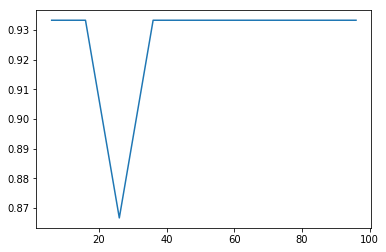

In [27]:
plt.plot(acc_by_M[acc_by_M['R']==6].Acc)

In [32]:
rank,r,n,X,Y,mod_w = 6,0.5,0.5,data_train,label_train,M_dict[str(0)]
k=1

In [33]:
P = RMmodel(rank,X)

In [34]:
        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]

In [40]:
1*(Y!=k)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [50]:
-1*np.sort(-1*(Y!=k))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [51]:
def TERmodel_new(rank,r,n,X,Y,mod_w):
    #simplified version of TER
    alpha = []
    for k in list(set(Y)):
        P = RMmodel(rank,X)

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]
        w_n = 1/mk_n
        w_p = 1/mk_p

        w_n = mod_w[0][0] * w_n + mod_w[0][1]
        w_p = mod_w[1][0] * w_n + mod_w[1][1]

        ones_mkn = -1*np.sort(-1*(Y!=k)) *w_n
        ones_mkp = -1*np.sort(-1*(Y==k)) *w_p

        W = np.zeros((len(Y), len(Y)), float)
        np.fill_diagonal(W,ones_mkn+ones_mkp)
        yk = ((r-n)*ones_mkn+(r+n)*ones_mkp).T
        ak = np.linalg.pinv((P.T).dot(W).dot(P)).dot(P.T).dot(W).dot(yk)

        alpha.append(ak)
    return(np.array(alpha).T)

In [52]:
acc_by_M = pd.DataFrame(columns=['M','R','Acc'])

for i in range(20):
    for j in range(10):
        alpha = TERmodel_new(j+1,0.5,0.5,data_train,label_train,M_dict[str(i)])

        P_t = RMmodel(j+1,data_test)
        yt = P_t.dot(alpha)
        yt1 = np.argmax(yt,axis=1)
        # plt.plot(yt1)

        pred_true = np.equal(label_test,yt1)
        acc = np.count_nonzero(pred_true) / len(pred_true)

        res_ser = pd.Series([i,j,acc],index=['M','R','Acc'])
        acc_by_M = acc_by_M.append(res_ser,ignore_index=True)
        #print(i,j, ":" ,acc)

KeyError: '10'

In [53]:
acc_MR = pd.DataFrame(columns=['M','R','Acc'])

for i in range(10):
    for j in range(10):
        alpha = TERmodel_new(j+1,0.5,0.5,data_train,label_train,M_dict[str(i)])

        P_t = RMmodel(j+1,data_test)
        yt = P_t.dot(alpha)
        yt1 = np.argmax(yt,axis=1)
        # plt.plot(yt1)

        pred_true = np.equal(label_test,yt1)
        acc = np.count_nonzero(pred_true) / len(pred_true)

        res_ser = pd.Series([i,j,acc],index=['M','R','Acc'])
        acc_MR = acc_MR.append(res_ser,ignore_index=True)
        #print(i,j, ":" ,acc)

In [55]:
yt1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [59]:
yt1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [61]:
label_test

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.])

In [62]:
1*(Y!=k)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [63]:
def TERmodel_new(rank,r,n,X,Y,mod_w):
    #simplified version of TER
    alpha = []
    for k in list(set(Y)):
        P = RMmodel(rank,X)

        mk_n = X[Y!=k].shape[0]
        mk_p = X[Y==k].shape[0]
        w_n = 1/mk_n
        w_p = 1/mk_p

        w_n = mod_w[0][0] * w_n + mod_w[0][1]
        w_p = mod_w[1][0] * w_n + mod_w[1][1]

        ones_mkn = 1*(Y!=k) *w_n
        ones_mkp = 1*(Y==k) *w_p

        W = np.zeros((len(Y), len(Y)), float)
        np.fill_diagonal(W,ones_mkn+ones_mkp)
        yk = ((r-n)*ones_mkn+(r+n)*ones_mkp).T
        ak = np.linalg.pinv((P.T).dot(W).dot(P)).dot(P.T).dot(W).dot(yk)

        alpha.append(ak)
    return(np.array(alpha).T)

M_dict = {}
M_dict['0'] = (0,1),(0,1)
M_dict['1'] = (1,0),(1,0)
M_dict['2'] = (1,0),(0,1)
M_dict['3'] = (0,1),(1,0)
M_dict['4'] = (1,0),(0.5,0)
M_dict['5'] = (0.5,0),(1,0)
M_dict['6'] = (1,0),(0.7,0)
M_dict['7'] = (0.7,0),(1,0)
M_dict['8'] = (1,0),(0.3,0)
M_dict['9'] = (0.3,0),(1,0)

acc_MR = pd.DataFrame(columns=['M','R','Acc'])

for i in range(10):
    for j in range(10):
        alpha = TERmodel_new(j+1,0.5,0.5,data_train,label_train,M_dict[str(i)])

        P_t = RMmodel(j+1,data_test)
        yt = P_t.dot(alpha)
        yt1 = np.argmax(yt,axis=1)
        # plt.plot(yt1)

        pred_true = np.equal(label_test,yt1)
        acc = np.count_nonzero(pred_true) / len(pred_true)

        res_ser = pd.Series([i,j,acc],index=['M','R','Acc'])
        acc_MR = acc_MR.append(res_ser,ignore_index=True)
        #print(i,j, ":" ,acc)

In [65]:
alpha = TERmodel(6,0.5,0.5,data_train,label_train)

In [67]:
        P_t = RMmodel(6,data_test)
        yt = P_t.dot(alpha)
        yt1 = np.argmax(yt,axis=1)
        # plt.plot(yt1)

        pred_true = np.equal(label_test,yt1)
        acc = np.count_nonzero(pred_true) / len(pred_true)

In [68]:
acc

0.9333333333333333

In [69]:
yt1

array([0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int64)

In [70]:
from sklearn.model_selection import KFold

In [71]:
kf = KFold(n_splits=10)

In [76]:
 kf.get_n_splits(data_train)

10

In [77]:
from sklearn.model_selection import StratifiedKFold

In [79]:
skf = StratifiedKFold(n_splits=10)

In [80]:
data = load_iris()
data_v = data['data']
data_l = data['target']

In [82]:
data_v.shape

(150, 4)

In [84]:
data_l.shape

(150,)

In [86]:
for train_index,test_index in skf.split(data_v,data_l):
    data_train,data_test = data_v[train_index],data_v[test_index]
    label_train,label_test = data_l[train_index],data_l[test_index]

In [91]:
label_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [99]:
acc_MR = pd.DataFrame(columns=['Split','M','R','Acc'])
split = 0

for train_index,test_index in skf.split(data_v,data_l):
    data_train,data_test = data_v[train_index],data_v[test_index]
    label_train,label_test = data_l[train_index],data_l[test_index]
    
    for i in range(10):
        for j in range(10):
            alpha = TERmodel_new(j+1,0.5,0.5,data_train,label_train,M_dict[str(i)])

            P_t = RMmodel(j+1,data_test)
            yt = P_t.dot(alpha)
            yt1 = np.argmax(yt,axis=1)

            pred_true = np.equal(label_test,yt1)
            acc = np.count_nonzero(pred_true) / len(pred_true)

            res_ser = pd.Series([split,i,j+1,acc],index=['Split','M','R','Acc'])
            acc_MR = acc_MR.append(res_ser,ignore_index=True)
                #print(i,j, ":" ,acc)

    print(split, end="|")
    split += 1

0|1|2|3|4|5|6|7|8|9|

In [98]:
np.mean(acc_MR[acc_MR.M==1].Acc)

0.9533333333333334

In [101]:
acc_MR.groupby('Split')

In [115]:
a = acc_MR.groupby(['M','R']).mean()

In [144]:
i

9

In [124]:
plot_df = a.unstack('M').loc[:,'Acc']

TypeError: int() argument must be a string, a bytes-like object or a number, not 'Float64Index'

In [129]:
res = acc_MR.groupby(['M','R']).mean()

In [136]:
acc_mr

NameError: name 'acc_mr' is not defined

In [143]:
acc_MR.M.values = 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2.

In [150]:
acc_MR[['M','R']] = acc_MR[['M','R']].astype(int)

In [152]:
res = acc_MR.groupby(['M','R']).mean()

In [159]:
plot_df = res.unstack('M').loc[:,'Acc']

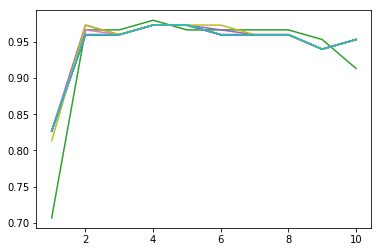

In [160]:
plt.plot(plot_df)

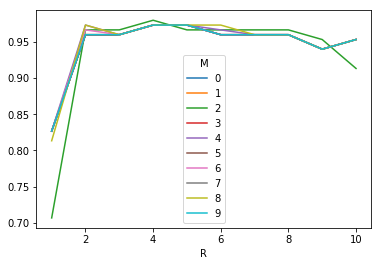

In [165]:
plot_df.plot()

In [166]:
plot_df = res.unstack('M')

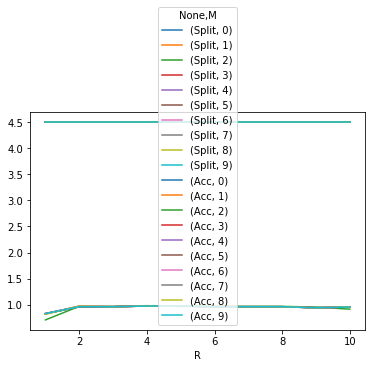

In [167]:
plot_df.plot()

In [169]:
plot_df = res.unstack('M').loc[:,'Acc']

(0.9, 1)

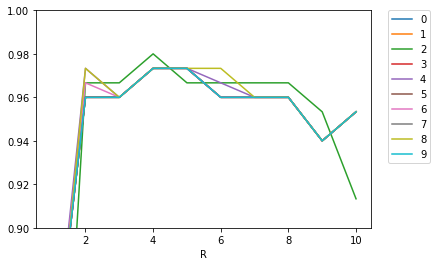

In [178]:
plot_df.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0.9,1)


In [179]:
for train_index,test_index in skf.split(data_v,data_l):
    data_train,data_test = data_v[train_index],data_v[test_index]
    label_train,label_test = data_l[train_index],data_l[test_index]
    
    for i in range(10):
        for j in range(5):
            rank = (j+1) * 2
            alpha = TERmodel_new(rank,0.5,0.5,data_train,label_train,M_dict[str(i)])

            P_t = RMmodel(rank,data_test)
            yt = P_t.dot(alpha)
            yt1 = np.argmax(yt,axis=1)

            pred_true = np.equal(label_test,yt1)
            acc = np.count_nonzero(pred_true) / len(pred_true)

            res_ser = pd.Series([split,i,rank,acc],index=['Split','M','R','Acc'])
            acc_MR = acc_MR.append(res_ser,ignore_index=True)
                #print(i,j, ":" ,acc)

    print(split, end="|")
    split += 1

10|11|12|13|

KeyboardInterrupt: 

0|1|2|3|4|5|6|7|8|9|

(0.9, 1)

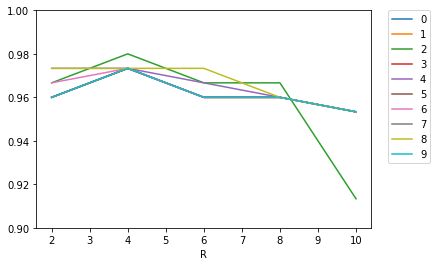

In [180]:
skf = StratifiedKFold(n_splits=10)
acc_MR = pd.DataFrame(columns=['Split','M','R','Acc'])
split = 0

for train_index,test_index in skf.split(data_v,data_l):
    data_train,data_test = data_v[train_index],data_v[test_index]
    label_train,label_test = data_l[train_index],data_l[test_index]
    
    for i in range(10):
        for j in range(5):
            rank = (j+1) * 2
            alpha = TERmodel_new(rank,0.5,0.5,data_train,label_train,M_dict[str(i)])

            P_t = RMmodel(rank,data_test)
            yt = P_t.dot(alpha)
            yt1 = np.argmax(yt,axis=1)

            pred_true = np.equal(label_test,yt1)
            acc = np.count_nonzero(pred_true) / len(pred_true)

            res_ser = pd.Series([split,i,rank,acc],index=['Split','M','R','Acc'])
            acc_MR = acc_MR.append(res_ser,ignore_index=True)
                #print(i,j, ":" ,acc)

    print(split, end="|")
    split += 1

acc_MR[['M','R']] = acc_MR[['M','R']].astype(int)
res = acc_MR.groupby(['M','R']).mean()
plot_df = res.unstack('M').loc[:,'Acc']

plot_df.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0.9,1)

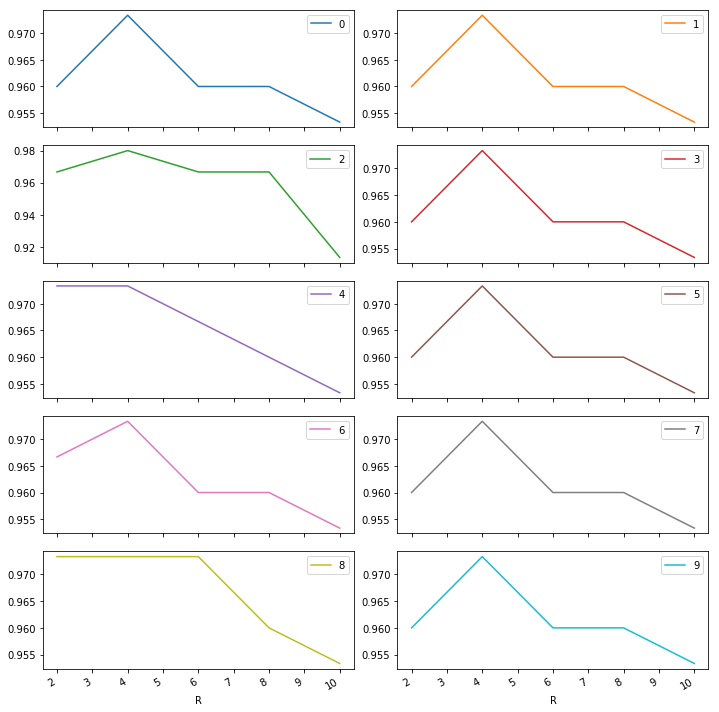

In [205]:
plot_df.plot(subplots=True,layout=[5,2],figsize=[10,10])
plt.tight_layout()

In [212]:
acc_MR[acc_MR.M==5].groupby(['M','R']).mean()

Split       Acc
M R                  
5 2     4.5  0.960000
  4     4.5  0.973333
  6     4.5  0.960000
  8     4.5  0.960000
  10    4.5  0.953333

0|1|2|3|4|5|6|7|8|9|

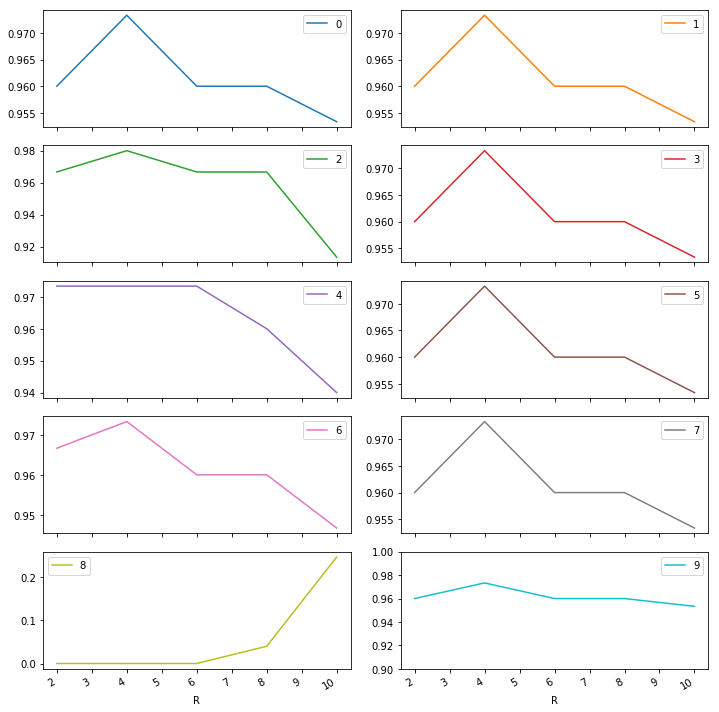

In [213]:
skf = StratifiedKFold(n_splits=10)
acc_MR = pd.DataFrame(columns=['Split','M','R','Acc'])
split = 0

for train_index,test_index in skf.split(data_v,data_l):
    data_train,data_test = data_v[train_index],data_v[test_index]
    label_train,label_test = data_l[train_index],data_l[test_index]
    
    for i in range(10):
        for j in range(5):
            rank = (j+1) * 2
            alpha = TERmodel_new(rank,1,0.5,data_train,label_train,M_dict[str(i)])

            P_t = RMmodel(rank,data_test)
            yt = P_t.dot(alpha)
            yt1 = np.argmax(yt,axis=1)

            pred_true = np.equal(label_test,yt1)
            acc = np.count_nonzero(pred_true) / len(pred_true)

            res_ser = pd.Series([split,i,rank,acc],index=['Split','M','R','Acc'])
            acc_MR = acc_MR.append(res_ser,ignore_index=True)
                #print(i,j, ":" ,acc)

    print(split, end="|")
    split += 1

acc_MR[['M','R']] = acc_MR[['M','R']].astype(int)
res = acc_MR.groupby(['M','R']).mean()
plot_df = res.unstack('M').loc[:,'Acc']

plot_df.plot(subplots=True,layout=[5,2],figsize=[10,10])
plt.ylim(0.9,1)
plt.tight_layout()

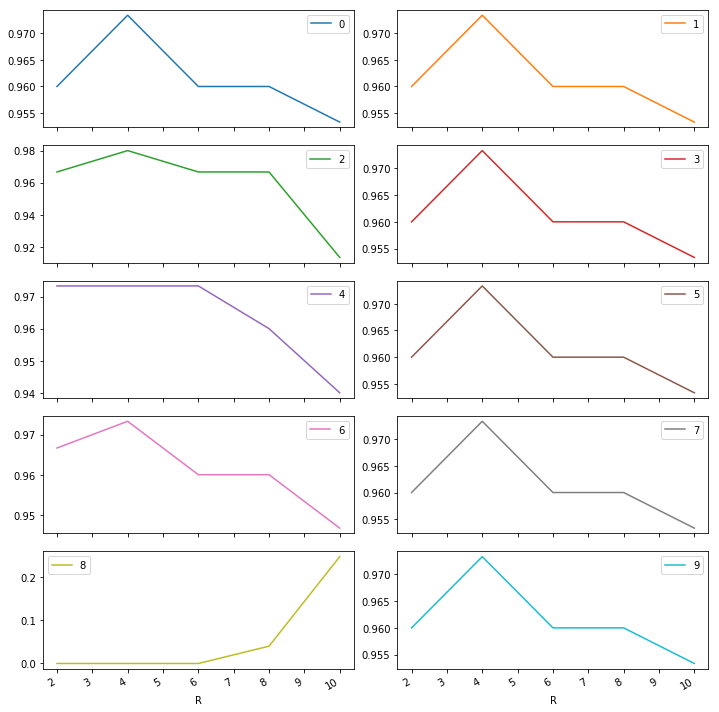

In [214]:
plot_df.plot(subplots=True,layout=[5,2],figsize=[10,10])
#plt.ylim(0.9,1)
plt.tight_layout()

In [216]:
res

Split       Acc
M R                  
0 2     4.5  0.960000
  4     4.5  0.973333
  6     4.5  0.960000
  8     4.5  0.960000
  10    4.5  0.953333
1 2     4.5  0.960000
  4     4.5  0.973333
  6     4.5  0.960000
  8     4.5  0.960000
  10    4.5  0.953333
2 2     4.5  0.966667
  4     4.5  0.980000
  6     4.5  0.966667
  8     4.5  0.966667
  10    4.5  0.913333
3 2     4.5  0.960000
  4     4.5  0.973333
  6     4.5  0.960000
  8     4.5  0.960000
  10    4.5  0.953333
4 2     4.5  0.973333
  4     4.5  0.973333
  6     4.5  0.973333
  8     4.5  0.960000
  10    4.5  0.940000
5 2     4.5  0.960000
  4     4.5  0.973333
  6     4.5  0.960000
  8     4.5  0.960000
  10    4.5  0.953333
6 2     4.5  0.966667
  4     4.5  0.973333
  6     4.5  0.960000
  8     4.5  0.960000
  10    4.5  0.946667
7 2     4.5  0.960000
  4     4.5  0.973333
  6     4.5  0.960000
  8     4.5  0.960000
  10    4.5  0.953333
8 2     4.5  0.000000
  4     4.5  0.000000
  6     4.5  0.000000
  8     4.5  0.040000
  10    4.5  0.246667
9 2     4.5  0.960000
  4     4.5  0.973333
  6     4.5  0.960000
  8     4.5  0.960000
  10    4.5  0.953333

0|1|2|3|4|5|6|7|8|9|

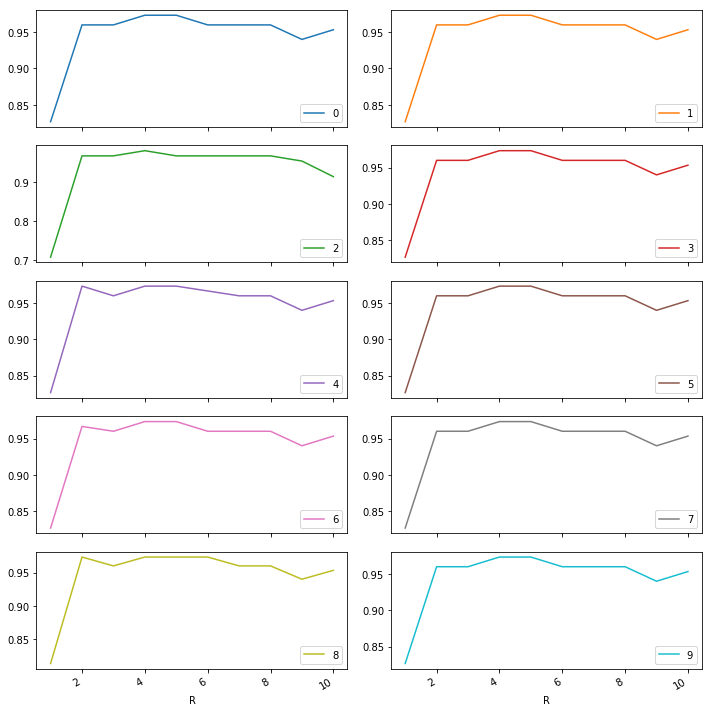

In [217]:
skf = StratifiedKFold(n_splits=10)
acc_MR = pd.DataFrame(columns=['Split','M','R','Acc'])
split = 0

for train_index,test_index in skf.split(data_v,data_l):
    data_train,data_test = data_v[train_index],data_v[test_index]
    label_train,label_test = data_l[train_index],data_l[test_index]
    
    for i in range(10):
        for j in range(10):
            rank = j+1
            alpha = TERmodel_new(rank,0.5,0.5,data_train,label_train,M_dict[str(i)])

            P_t = RMmodel(rank,data_test)
            yt = P_t.dot(alpha)
            yt1 = np.argmax(yt,axis=1)

            pred_true = np.equal(label_test,yt1)
            acc = np.count_nonzero(pred_true) / len(pred_true)

            res_ser = pd.Series([split,i,rank,acc],index=['Split','M','R','Acc'])
            acc_MR = acc_MR.append(res_ser,ignore_index=True)
                #print(i,j, ":" ,acc)

    print(split, end="|")
    split += 1

acc_MR[['M','R']] = acc_MR[['M','R']].astype(int)
res = acc_MR.groupby(['M','R']).mean()
plot_df = res.unstack('M').loc[:,'Acc']

plot_df.plot(subplots=True,layout=[5,2],figsize=[10,10])
#plt.ylim(0.9,1)
plt.tight_layout()


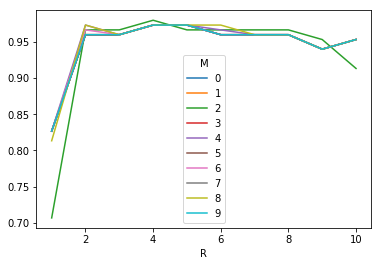

In [218]:
plot_df.plot()

0|1|2|3|4|

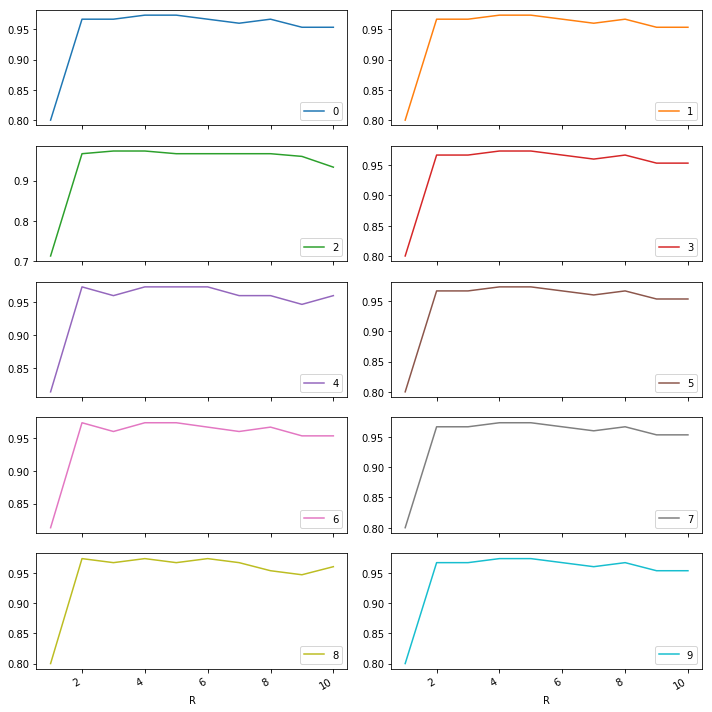

In [219]:
skf = StratifiedKFold(n_splits=5)
acc_MR = pd.DataFrame(columns=['Split','M','R','Acc'])
split = 0

for train_index,test_index in skf.split(data_v,data_l):
    data_train,data_test = data_v[train_index],data_v[test_index]
    label_train,label_test = data_l[train_index],data_l[test_index]
    
    for i in range(10):
        for j in range(10):
            rank = j+1
            alpha = TERmodel_new(rank,0.5,0.5,data_train,label_train,M_dict[str(i)])

            P_t = RMmodel(rank,data_test)
            yt = P_t.dot(alpha)
            yt1 = np.argmax(yt,axis=1)

            pred_true = np.equal(label_test,yt1)
            acc = np.count_nonzero(pred_true) / len(pred_true)

            res_ser = pd.Series([split,i,rank,acc],index=['Split','M','R','Acc'])
            acc_MR = acc_MR.append(res_ser,ignore_index=True)
                #print(i,j, ":" ,acc)

    print(split, end="|")
    split += 1

acc_MR[['M','R']] = acc_MR[['M','R']].astype(int)
res = acc_MR.groupby(['M','R']).mean()
plot_df = res.unstack('M').loc[:,'Acc']

plot_df.plot(subplots=True,layout=[5,2],figsize=[10,10])
#plt.ylim(0.9,1)
plt.tight_layout()

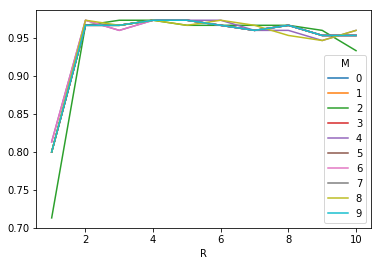

In [220]:
plot_df.plot()

In [221]:
res

Split       Acc
M R                  
0 1     2.0  0.800000
  2     2.0  0.966667
  3     2.0  0.966667
  4     2.0  0.973333
  5     2.0  0.973333
  6     2.0  0.966667
  7     2.0  0.960000
  8     2.0  0.966667
  9     2.0  0.953333
  10    2.0  0.953333
1 1     2.0  0.800000
  2     2.0  0.966667
  3     2.0  0.966667
  4     2.0  0.973333
  5     2.0  0.973333
  6     2.0  0.966667
  7     2.0  0.960000
  8     2.0  0.966667
  9     2.0  0.953333
  10    2.0  0.953333
2 1     2.0  0.713333
  2     2.0  0.966667
  3     2.0  0.973333
  4     2.0  0.973333
  5     2.0  0.966667
  6     2.0  0.966667
  7     2.0  0.966667
  8     2.0  0.966667
  9     2.0  0.960000
  10    2.0  0.933333
...     ...       ...
7 1     2.0  0.800000
  2     2.0  0.966667
  3     2.0  0.966667
  4     2.0  0.973333
  5     2.0  0.973333
  6     2.0  0.966667
  7     2.0  0.960000
  8     2.0  0.966667
  9     2.0  0.953333
  10    2.0  0.953333
8 1     2.0  0.800000
  2     2.0  0.973333
  3     2.0  0.966667
  4     2.0  0.973333
  5     2.0  0.966667
  6     2.0  0.973333
  7     2.0  0.966667
  8     2.0  0.953333
  9     2.0  0.946667
  10    2.0  0.960000
9 1     2.0  0.800000
  2     2.0  0.966667
  3     2.0  0.966667
  4     2.0  0.973333
  5     2.0  0.973333
  6     2.0  0.966667
  7     2.0  0.960000
  8     2.0  0.966667
  9     2.0  0.953333
  10    2.0  0.953333

[100 rows x 2 columns]

In [222]:
skf = StratifiedKFold(n_splits=10)
acc_MR = pd.DataFrame(columns=['Split','M','R','Acc'])
split = 0

for train_index,test_index in skf.split(data_v,data_l):
    data_train,data_test = data_v[train_index],data_v[test_index]
    label_train,label_test = data_l[train_index],data_l[test_index]
    
    for i in range(10):
        for j in range(10):
            rank = j+1
            alpha = TERmodel_new(rank,0.5,0.5,data_train,label_train,M_dict[str(i)])

            P_t = RMmodel(rank,data_test)
            yt = P_t.dot(alpha)
            yt1 = np.argmax(yt,axis=1)

            pred_true = np.equal(label_test,yt1)
            acc = np.count_nonzero(pred_true) / len(pred_true)

            res_ser = pd.Series([split,i,rank,acc],index=['Split','M','R','Acc'])
            acc_MR = acc_MR.append(res_ser,ignore_index=True)
                #print(i,j, ":" ,acc)

    print(split, end="|")
    split += 1


0|1|2|3|4|5|6|7|8|9|

In [223]:
acc_MR[['M','R']] = acc_MR[['M','R']].astype(int)

In [224]:
acc_MR

,Split,M,R,Acc
0,0.0,0,1,0.733333
1,0.0,0,2,1.000000
2,0.0,0,3,1.000000
3,0.0,0,4,1.000000
4,0.0,0,5,1.000000
5,0.0,0,6,1.000000
6,0.0,0,7,1.000000
7,0.0,0,8,1.000000
8,0.0,0,9,1.000000
9,0.0,0,10,1.000000


In [225]:
res = acc_MR.groupby(['M','R']).mean()

In [226]:
res

Split       Acc
M R                  
0 1     4.5  0.826667
  2     4.5  0.960000
  3     4.5  0.960000
  4     4.5  0.973333
  5     4.5  0.973333
  6     4.5  0.960000
  7     4.5  0.960000
  8     4.5  0.960000
  9     4.5  0.940000
  10    4.5  0.953333
1 1     4.5  0.826667
  2     4.5  0.960000
  3     4.5  0.960000
  4     4.5  0.973333
  5     4.5  0.973333
  6     4.5  0.960000
  7     4.5  0.960000
  8     4.5  0.960000
  9     4.5  0.940000
  10    4.5  0.953333
2 1     4.5  0.706667
  2     4.5  0.966667
  3     4.5  0.966667
  4     4.5  0.980000
  5     4.5  0.966667
  6     4.5  0.966667
  7     4.5  0.966667
  8     4.5  0.966667
  9     4.5  0.953333
  10    4.5  0.913333
...     ...       ...
7 1     4.5  0.826667
  2     4.5  0.960000
  3     4.5  0.960000
  4     4.5  0.973333
  5     4.5  0.973333
  6     4.5  0.960000
  7     4.5  0.960000
  8     4.5  0.960000
  9     4.5  0.940000
  10    4.5  0.953333
8 1     4.5  0.813333
  2     4.5  0.973333
  3     4.5  0.960000
  4     4.5  0.973333
  5     4.5  0.973333
  6     4.5  0.973333
  7     4.5  0.960000
  8     4.5  0.960000
  9     4.5  0.940000
  10    4.5  0.953333
9 1     4.5  0.826667
  2     4.5  0.960000
  3     4.5  0.960000
  4     4.5  0.973333
  5     4.5  0.973333
  6     4.5  0.960000
  7     4.5  0.960000
  8     4.5  0.960000
  9     4.5  0.940000
  10    4.5  0.953333

[100 rows x 2 columns]

In [227]:
res1 = acc_MR.groupby(['M','R']).std()

In [228]:
res1

Split       Acc
M R                    
0 1   3.02765  0.089993
  2   3.02765  0.046614
  3   3.02765  0.046614
  4   3.02765  0.046614
  5   3.02765  0.046614
  6   3.02765  0.056218
  7   3.02765  0.056218
  8   3.02765  0.056218
  9   3.02765  0.058373
  10  3.02765  0.054885
1 1   3.02765  0.089993
  2   3.02765  0.046614
  3   3.02765  0.046614
  4   3.02765  0.046614
  5   3.02765  0.046614
  6   3.02765  0.056218
  7   3.02765  0.056218
  8   3.02765  0.056218
  9   3.02765  0.058373
  10  3.02765  0.054885
2 1   3.02765  0.034427
  2   3.02765  0.047140
  3   3.02765  0.047140
  4   3.02765  0.044997
  5   3.02765  0.056656
  6   3.02765  0.047140
  7   3.02765  0.047140
  8   3.02765  0.035136
  9   3.02765  0.044997
  10  3.02765  0.070623
...       ...       ...
7 1   3.02765  0.089993
  2   3.02765  0.046614
  3   3.02765  0.046614
  4   3.02765  0.046614
  5   3.02765  0.046614
  6   3.02765  0.056218
  7   3.02765  0.056218
  8   3.02765  0.056218
  9   3.02765  0.058373
  10  3.02765  0.054885
8 1   3.02765  0.081952
  2   3.02765  0.046614
  3   3.02765  0.046614
  4   3.02765  0.046614
  5   3.02765  0.046614
  6   3.02765  0.046614
  7   3.02765  0.056218
  8   3.02765  0.056218
  9   3.02765  0.058373
  10  3.02765  0.054885
9 1   3.02765  0.089993
  2   3.02765  0.046614
  3   3.02765  0.046614
  4   3.02765  0.046614
  5   3.02765  0.046614
  6   3.02765  0.056218
  7   3.02765  0.056218
  8   3.02765  0.056218
  9   3.02765  0.058373
  10  3.02765  0.054885

[100 rows x 2 columns]

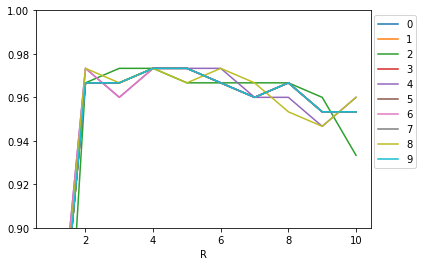

In [240]:
plot_df.plot()
plt.ylim(0.9,1)
plt.legend(bbox_to_anchor=(1.15, 1))

In [244]:
acc_MR[acc_MR.R==6].groupby(['M','R']).std()

,,Split,Acc
M,R,,
0,6,3.02765,0.056218
1,6,3.02765,0.056218
2,6,3.02765,0.047140
3,6,3.02765,0.056218
4,6,3.02765,0.047140
5,6,3.02765,0.056218
6,6,3.02765,0.056218
7,6,3.02765,0.056218
8,6,3.02765,0.046614
